# Network Plot for Bigrams

The code in this notebook was referenced from [this](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/calculate-tweet-word-bigrams/) article.

Network plots show interconnections between a set of entities. Each entity is represented by a Node. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns; sns.set()
%matplotlib inline
# packages for NLP preprocessing
import nltk
from sklearn.feature_extraction import text 
from nltk.stem import WordNetLemmatizer 
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.collocations import *
import pickle

In [3]:
processed_data = pickle.load(open(r'C:\Users\Ricky\Desktop\4.2 FINAL SEMESTER\PROJECT II  Computer systems Project\rOOT\Preprocessing\pickle\processed_data.pkl', 'rb'))

In [4]:
from nltk import bigrams

# create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in processed_data]

In [5]:
terms_bigram[0]

[('kindly', 'say'),
 ('say', 'bickering'),
 ('bickering', 'kikuyus'),
 ('kikuyus', 'kalenjins'),
 ('kalenjins', 'rest'),
 ('rest', 'country')]

## Creating bigrams

In [6]:
import itertools
import collections

# flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

In [8]:
bigram_counts.most_common(31)

[(('kikuyus', 'kalenjins'), 487),
 (('kill', 'luos'), 321),
 (('cyprian', 'nyakundi'), 312),
 (('warudi', 'kwao'), 281),
 (('hate', 'speech'), 259),
 (('uhuru', 'kenyatta'), 249),
 (('masai', 'mara'), 236),
 (('hawa', 'wazungu'), 233),
 (('moses', 'kuria'), 229),
 (('maasai', 'mara'), 205),
 (('raila', 'odinga'), 197),
 (('hate', 'luos'), 187),
 (('hate', 'kikuyus'), 186),
 (('william', 'ruto'), 170),
 (('kikuyus', 'luos'), 157),
 (('dont', 'know'), 149),
 (('kalenjins', 'kikuyus'), 140),
 (('nasa', 'suppoers'), 130),
 (('supreme', 'cou'), 127),
 (('kill', 'us'), 124),
 (('one', 'day'), 123),
 (('free', 'fair'), 121),
 (('gon', 'na'), 120),
 (('luos', 'kikuyus'), 120),
 (('social', 'media'), 120),
 (('boy', 'child'), 120),
 (('luos', 'luhyas'), 116),
 (('dont', 'want'), 115),
 (('watu', 'wa'), 113),
 (('uhuru', 'ruto'), 109),
 (('babu', 'owino'), 107)]

In [10]:
bigram_df = pd.DataFrame(bigram_counts.most_common(31), columns=['bigram', 'count'])
bigram_df

,bigram,count
0,"(kikuyus, kalenjins)",487
1,"(kill, luos)",321
2,"(cyprian, nyakundi)",312
3,"(warudi, kwao)",281
4,"(hate, speech)",259
5,"(uhuru, kenyatta)",249
6,"(masai, mara)",236
7,"(hawa, wazungu)",233
8,"(moses, kuria)",229
9,"(maasai, mara)",205


In [11]:
bigram_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   bigram  31 non-null     object
 1   count   31 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 624.0+ bytes


In [ ]:
# bigram_df['bigram'] = bigram_df['bigram'].astype(str).str.replace('nigga','nxxga')
# bigram_df['bigram'] = bigram_df['bigram'].astype(str).str.replace('bitch','bxxch')

In [12]:
bigram_df.head()

,bigram,count
0,"(kikuyus, kalenjins)",487
1,"(kill, luos)",321
2,"(cyprian, nyakundi)",312
3,"(warudi, kwao)",281
4,"(hate, speech)",259


## Visualize Networks of Bigrams

Now we can use this Dataframe to visualize the top 20 occurring bigrams as networks using the package `NetworkX`.



In [13]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')

In [14]:
import networkx as nx

# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

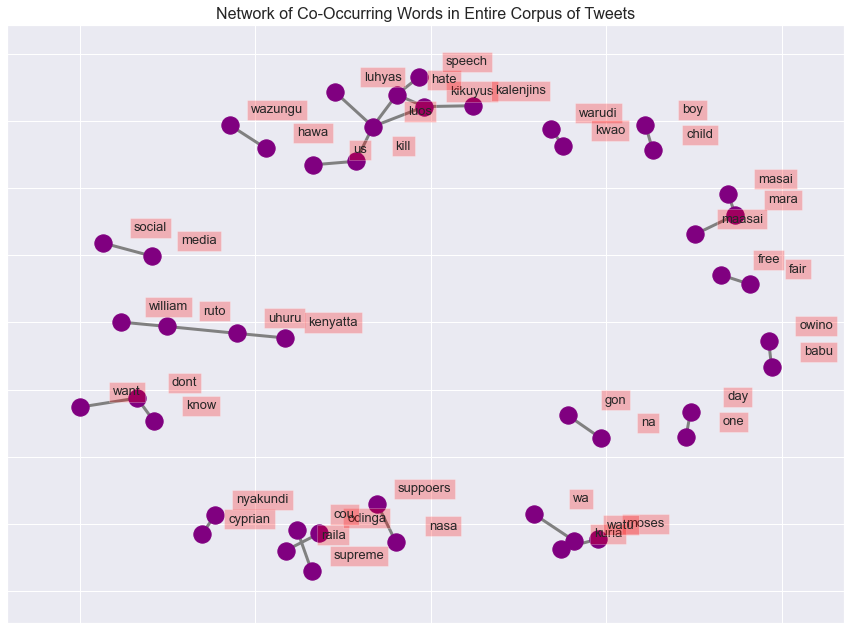

In [17]:
fig, ax = plt.subplots(figsize=(15,11))

random_pos = nx.random_layout(G, seed=38)
pos = nx.spring_layout(G, k=3, pos=random_pos)
# pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=12,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.title('Network of Co-Occurring Words in Entire Corpus of Tweets', fontsize=16)

#plt.savefig('../visualizations/uncensored_bigrams_network.png', bbox_inches = "tight", pad_inches=.5)
plt.show()

This plot displays the networks of co-occurring words in tweets with hate speech or offensive language
